# Visualization

In [1]:
# to PCA descriptors but need to do normalization
# MDS = multidimensional scaling
# tsne narozdiel od MDS sa snazi zachovat vzdialenosti medzi bodmi

In [2]:
########################################
from rdkit import Chem
from rdkit import RDLogger
import matplotlib.pyplot as plt
import pandas as pd
import gzip
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
from itertools import chain
from rdkit.Chem import MACCSkeys
import numpy as np
import seaborn as sns
#####################################

# rdkit mols are displayed as images
from rdkit.Chem.Draw import IPythonConsole

from rdkit.Chem import AllChem as Chem
from rdkit import DataStructs

# descriptors
from rdkit import Chem
from rdkit.Chem import Lipinski
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

# diversity picker
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

# plots
from matplotlib import pyplot
import seaborn

# scikit learn
# conda install -c conda-forge scikit-learn 
from scipy.spatial import distance
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing
import umap

# other packages
import pandas as pd
import csv
import re

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.error')

PCA, MDS, tsne using sklearn library with df.csv and similarity matrix -> to distance matrix



In [3]:

# load data
df = pd.read_csv('../data/df.csv')

# load similarity matrix
similarity_matrix = np.load('../data/similarity_matrix.npy')



In [4]:
df.head()

,Unnamed: 0,Mol,Source,FP,MACCS_keys,tanimoto,MW,LogP,HBA,HBD,TPSA,RB,Picked
0,0,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509f50>,drugbank,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[False, False, False, False, False, False, Fal...",0.119266,2180.317,-8.11643,29,28,901.57,66,False
1,1,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509fc0>,drugbank,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[False, False, False, False, False, False, Fal...",0.098361,1269.433,-3.10570,16,17,495.89,31,False
2,2,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a030>,drugbank,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[False, False, False, False, False, False, Fal...",0.118812,1069.238,-4.13203,15,14,435.41,19,False
3,3,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a0a0>,drugbank,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[False, False, False, False, False, False, Fal...",0.129630,1431.064,-0.50613,16,17,495.67,38,False
4,4,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a110>,drugbank,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[False, False, False, False, False, False, Fal...",0.058824,1202.635,3.26900,12,5,278.80,15,False


In [5]:
# create distance matrix from similarity matrix
dist_matrix = 1 - similarity_matrix

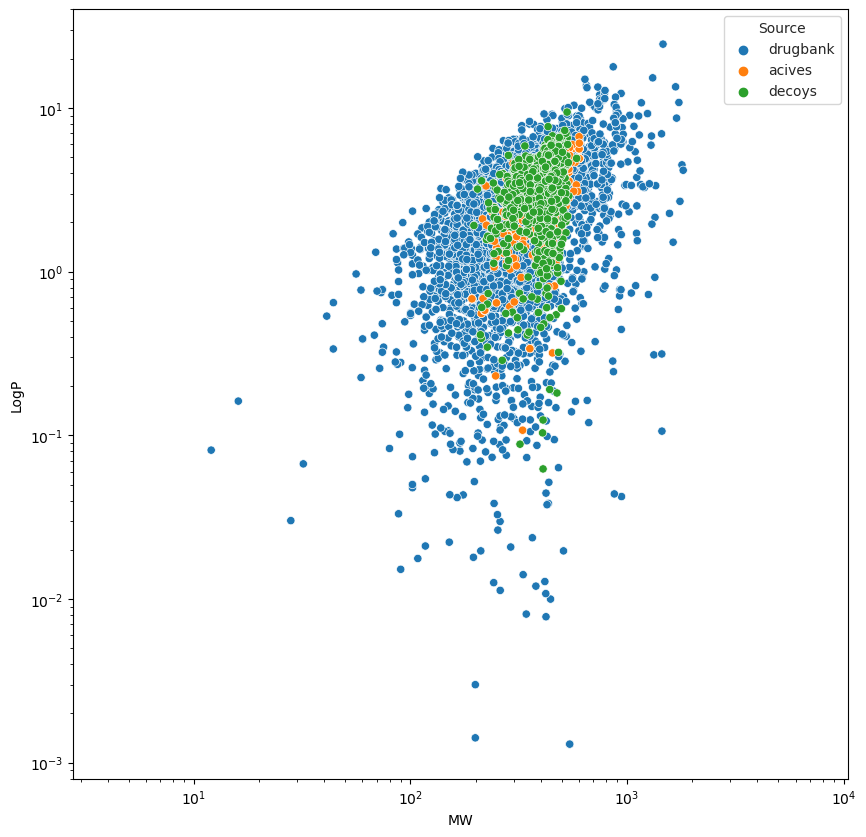

In [6]:
# use df_most_diverse and create plot and visualize from which sourceare the strucutres
# x = MW, y = LogP hue = source
# seaborn plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style("whitegrid")
# log axes for MW and LogP
ax.set_xscale('log')
ax.set_yscale('log')
# scatter plot without drugbank
sns.scatterplot(x='MW', y='LogP', hue='Source', data=df)
plt.show()